#Data Acquisition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Final Year Project/Datasets/S01_ME

/content/drive/MyDrive/Final Year Project/Datasets/S01_ME


In [3]:
ls

motorexecution_subject1_run10.gdf  motorexecution_subject1_run5.gdf
motorexecution_subject1_run1.gdf   motorexecution_subject1_run6.gdf
motorexecution_subject1_run2.gdf   motorexecution_subject1_run7.gdf
motorexecution_subject1_run3.gdf   motorexecution_subject1_run8.gdf
motorexecution_subject1_run4.gdf   motorexecution_subject1_run9.gdf


In [4]:
%%capture
pip install mne

In [5]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
files = os.listdir("/content/drive/MyDrive/Final Year Project/Datasets/S01_ME")
files[5]

'motorexecution_subject1_run6.gdf'

In [7]:
%%capture
from mne.io import concatenate_raws, read_raw_gdf

raws = [read_raw_gdf(f, preload = True, exclude=['eog-r', 'eog-m','eog-l', 'thumb_near', 'thumb_far', 'thumb_index', 'index_near','index_far', 'index_middle', 'middle_near', 'middle_far', 'middle_ring','ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far','thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture', 'handPosX','handPosY', 'handPosZ', 'elbowPosX', 'elbowPosY', 'elbowPosZ','ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation', 'Elbow','ProSupination', 'Wrist', 'GripPressure']) for f in files]

#Combine all loaded runs
raw_data = concatenate_raws(raws)

event_id = {'1536': 1, '1537': 2, '1538': 3, '1539': 4, '1540': 5, '1541': 6, '1542': 7}

events = mne.events_from_annotations(raw_data, event_id=event_id)[0]
epochs = mne.Epochs(raw_data, events, event_id=event_id)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df = epochs.to_data_frame()

Using data from preloaded Raw for 420 events and 359 original time points ...
0 bad epochs dropped


In [10]:
df.sample(5)

,time,condition,epoch,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,eeg-9,eeg-10,eeg-11,eeg-12,eeg-13,eeg-14,eeg-15,eeg-16,eeg-17,eeg-18,eeg-19,eeg-20,eeg-21,eeg-22,eeg-23,eeg-24,eeg-25,eeg-26,eeg-27,eeg-28,eeg-29,eeg-30,eeg-31,eeg-32,eeg-33,eeg-34,eeg-35,eeg-36,eeg-37,eeg-38,eeg-39,eeg-40,eeg-41,eeg-42,eeg-43,eeg-44,eeg-45,eeg-46,eeg-47,eeg-48,eeg-49,eeg-50,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
76016,0.322266,1537,211,-1.338799e+07,-6.548316e+06,-2.647978e+06,5.385647e+05,-3.223813e+06,1.396793e+06,1.429133e+06,-8.047975e+06,-2.197640e+06,-7.988627e+06,4.468413e+05,2.240090e+06,-3.781824e+06,4.167798e+06,-1.967887e+06,-8.516810e+06,-1.570369e+07,-6.516488e+06,-4.583005e+06,-5.165037e+06,1.055086e+06,-3.863466e+06,-7.237494e+06,-6.467918e+06,-1.007846e+07,-5.923150e+06,-3.034071e+06,-5.462457e+06,-1.405996e+07,-1.658200e+07,-8.262340e+06,-8.653816e+06,-1.676917e+06,-3.139542e+06,-2.028085e+07,-1.850717e+07,-1.824906e+07,-2.225563e+07,-1.806662e+07,-2.106483e+07,1.620038e+07,-1.641072e+07,-1.195482e+07,-2.062114e+07,-2.336303e+07,-2.160404e+07,-2.353930e+07,-1.375768e+06,-2.258201e+07,-2.556067e+07,-3.197216e+07,-3.040388e+07,-1.940097e+07,-1.332749e+07,-2.094187e+07,-2.490695e+07,-3.462395e+07,-2.415643e+07,-2.431407e+07,-2.913255e+07,-2.937360e+07
108629,0.212891,1541,302,2.128031e+07,2.344957e+07,1.714519e+07,2.276661e+07,1.726633e+07,2.048971e+07,2.840452e+07,2.351271e+07,2.405493e+07,1.725284e+07,9.875713e+06,2.234824e+07,2.357128e+07,2.301610e+07,2.369937e+07,1.934684e+07,1.421473e+07,4.026225e+06,1.519148e+07,1.793699e+07,2.604701e+07,2.151768e+07,2.160278e+07,1.643940e+07,6.270769e+06,4.187306e+06,1.668256e+07,2.187941e+07,1.890844e+07,1.771958e+07,1.396466e+07,9.703153e+06,6.563465e+06,1.928049e+07,2.412387e+07,2.299146e+07,2.654178e+07,2.147397e+07,1.784369e+07,1.145826e+07,3.347564e+06,2.030391e+07,2.652036e+07,2.388104e+07,2.789175e+07,1.857937e+07,1.700757e+07,5.012529e+06,3.000824e+07,2.228669e+07,2.371061e+07,2.294865e+07,1.859477e+07,1.379633e+07,2.331349e+07,2.441954e+07,2.035964e+07,1.873975e+07,1.470325e+07,2.057072e+07,1.820242e+07
104656,0.166016,1538,291,5.146821e+06,8.254565e+06,1.455990e+07,1.417703e+07,1.061551e+07,8.240424e+06,1.607447e+07,7.742837e+06,1.769503e+07,2.487883e+07,2.325318e+07,5.141123e+06,8.461817e+06,1.386324e+07,1.352647e+07,2.216987e+07,1.415050e+07,2.346045e+07,-1.111660e+06,1.040973e+06,1.215905e+07,1.565821e+07,2.810782e+07,1.677831e+07,9.668538e+06,7.746762e+06,3.047866e+06,1.183922e+07,1.401363e+07,1.975961e+07,1.757565e+07,1.081335e+07,9.246037e+06,-9.951023e+06,2.416250e+06,9.080858e+06,8.807828e+06,1.265073e+07,1.854311e+07,1.482616e+07,4.622310e+06,-2.277235e+06,5.699759e+05,8.635607e+06,1.113955e+07,1.694528e+07,1.939993e+07,1.100244e+07,1.469629e+06,5.586345e+06,1.486017e+07,1.735942e+07,1.167259e+07,8.566959e+06,-3.756857e+06,7.656406e+06,1.476832e+07,1.408174e+07,1.223797e+07,1.295943e+07,1.364778e+07
92761,0.072266,1536,258,-6.016744e+06,-5.086720e+06,1.836506e+04,3.096210e+06,-5.534749e+06,-3.965958e+06,-8.817762e+06,-6.966977e+06,-1.182295e+06,-8.911021e+06,-5.244984e+06,-4.495383e+06,-1.116774e+07,-6.679043e+06,-4.065785e+06,-4.692060e+06,-1.156839e+07,-7.950641e+05,-2.166947e+07,-1.629980e+07,-9.031527e+06,-4.079654e+06,-3.280700e+06,-3.738734e+06,-4.637710e+06,-2.017494e+07,-1.953799e+07,-1.188124e+07,-2.927891e+06,-1.302621e+06,5.963194e+04,-2.053725e+06,-6.597967e+06,-1.962362e+07,-1.483521e+07,-1.007204e+07,-1.016880e+07,-6.974093e+06,-7.211084e+06,-1.278727e+07,-1.140074e+07,-1.337652e+07,-1.326814e+07,-8.617453e+06,-4.249943e+05,-4.946590e+06,-9.398077e+06,-1.263126e+07,-1.261511e+07,-9.806183e+06,-4.776891e+06,-2.829327e+06,-7.841612e+06,-7.137278e+06,-4.965455e+06,-1.638767e+06,4.937220e+06,3.284331e+05,-4.092619e+06,9.893126e+06,4.916077e+06
97834,0.164062,1537,272,1.252540e+07,8.262653e+06,1.430894e+07,1.764142e+07,1.862368e+07,-1.161100e+06,1.053074e+07,1.080746e+07,1.737106e+07,2.229925e+07,1.482884e+07,7.722803e+06

In [11]:
df = df.replace({"condition":event_id})

In [12]:
df.sample(5)

,time,condition,epoch,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,eeg-9,eeg-10,eeg-11,eeg-12,eeg-13,eeg-14,eeg-15,eeg-16,eeg-17,eeg-18,eeg-19,eeg-20,eeg-21,eeg-22,eeg-23,eeg-24,eeg-25,eeg-26,eeg-27,eeg-28,eeg-29,eeg-30,eeg-31,eeg-32,eeg-33,eeg-34,eeg-35,eeg-36,eeg-37,eeg-38,eeg-39,eeg-40,eeg-41,eeg-42,eeg-43,eeg-44,eeg-45,eeg-46,eeg-47,eeg-48,eeg-49,eeg-50,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
72432,0.333984,5,201,1.957358e+06,1.033517e+07,1.646430e+07,2.045551e+07,2.604995e+07,-7.663574e+06,9.427052e+05,9.201518e+06,1.209331e+07,1.855951e+07,7.239846e+06,-1.185987e+07,-1.639394e+07,2.361437e+06,1.022621e+07,1.873259e+07,1.507110e+07,-1.809148e+06,-4.502697e+06,-8.604473e+06,1.289797e+06,8.818857e+06,1.153283e+07,1.445982e+07,8.303128e+06,7.759607e+06,-9.659801e+06,-7.460255e+06,-4.046711e+06,4.931295e+06,1.178907e+07,1.448251e+07,-4.812282e+06,-1.654736e+07,-2.267124e+07,-1.226656e+07,-9.554728e+06,-5.258057e+06,5.740905e+06,4.499038e+05,-5.641639e+06,-2.005103e+07,-1.426398e+07,-7.694710e+06,-1.445620e+07,-1.753375e+06,-7.980040e+06,-7.549255e+05,-2.305405e+07,-1.707653e+07,-1.834165e+07,-1.585755e+07,-5.492899e+06,-6.583325e+06,-2.887176e+07,-3.129512e+07,-2.471217e+07,-9.476897e+06,-3.706944e+06,-3.668824e+07,-1.828296e+07
140983,0.298828,1,392,-1.453789e+07,-1.692748e+07,-1.753736e+07,-1.237266e+07,-1.009701e+07,-2.088639e+07,-2.041258e+07,-1.660520e+07,-1.947113e+07,-2.044071e+07,-1.134702e+07,-1.423993e+07,-1.081232e+07,-2.072185e+07,-2.658520e+07,-2.173546e+07,-2.395210e+07,-8.138871e+06,-4.041502e+06,-5.987603e+06,-1.914093e+07,-1.973854e+07,-4.144341e+07,-1.947539e+07,-1.423031e+07,-8.095160e+06,-6.825430e+06,-8.679659e+06,-8.568622e+06,-1.432387e+07,-1.369426e+07,-1.288637e+07,-1.540162e+07,-3.136404e+06,-1.281086e+07,-1.444869e+07,-1.386918e+07,-1.937098e+07,-1.429092e+07,-1.228253e+07,6.844753e+06,-4.265265e+06,-1.214746e+07,-1.650248e+07,-6.701430e+06,-1.216891e+07,-1.469722e+07,4.302936e+06,-1.214704e+06,-2.618970e+06,-2.075032e+06,-2.260169e+06,-2.482818e+06,-1.077878e+06,3.336338e+06,-2.209994e+05,-2.509969e+06,3.442499e+06,3.302613e+06,4.155878e+06,5.522499e+06
87386,0.091797,4,243,-1.583418e+07,-1.369209e+07,-2.169248e+07,-1.567487e+07,-1.255815e+07,-1.025441e+07,-1.008844e+07,-1.505809e+07,-1.624854e+07,-8.920747e+06,-1.385783e+07,-8.035735e+06,-1.418742e+07,-1.267159e+07,-1.418605e+07,-1.185576e+07,3.112916e+06,-2.800657e+07,2.892332e+05,7.241448e+05,-1.225016e+07,-1.296808e+07,-2.180568e+07,-8.816556e+06,-1.843034e+06,-2.087217e+07,-2.233057e+06,-7.833501e+06,-1.333346e+07,-1.100146e+07,-9.473230e+06,-6.727622e+06,1.080472e+06,1.637307e+06,1.141962e+05,-6.202336e+06,-8.378541e+06,-7.072872e+06,-4.431129e+06,-2.568604e+06,-6.679142e+05,-1.987859e+06,-4.395389e+06,-6.945867e+06,-2.908435e+06,1.908115e+06,-2.713670e+06,-7.800601e+05,1.741085e+06,-8.084833e+06,-4.761927e+06,-2.600027e+06,-2.133791e+06,-3.596163e+06,-2.584826e+06,-5.979786e+06,-4.964533e+06,-2.520697e+06,-1.729767e+06,4.214863e+06,3.676137e+06
108682,0.316406,6,302,3.257215e+05,2.333847e+06,-2.938301e+06,5.776372e+06,-3.961696e+06,-1.012308e+07,1.552962e+06,5.706069e+06,8.229250e+06,2.250640e+06,-5.874042e+06,3.616794e+06,-2.143806e+06,5.021963e+06,6.088531e+06,4.060703e+06,7.031629e+06,-7.458638e+06,-2.170339e+06,-3.469428e+05,6.510880e+06,5.538674e+06,-7.335700e+06,4.219921e+06,-4.189681e+06,2.590830e+05,-2.544562e+05,6.321059e+06,8.088125e+06,8.910253e+06,3.750303e+06,-4.953329e+05,-1.185988e+07,-8.796906e+06,-1.077056e+06,7.231938e+06,8.008092e+06,7.733733e+06,3.742858e+06,-8.033687e+06,-1.090244e+07,2.175976e+06,9.060156e+06,9.673522e+06,1.624258e+07,9.711203e+06,3.583010e+06,-1.113981e+07,1.500678e+07,1.158015e+07,1.284488e+07,1.781584e+07,9.119183e+06,1.388373e+06,1.362208e+07,1.213243e+07,1.305812e+07,9.463381e+06,5.574586e+06,1.241179e+07,1.459036e+07
84252,0.281250,2,234,1.430359e+07,1.396804e+07,1.116828e+07,7.910280e+06,6.413617e+06,1.388586e+07,8.330438e+06,1.439230e+07,7.758713e+06,4.7212

<AxesSubplot:>

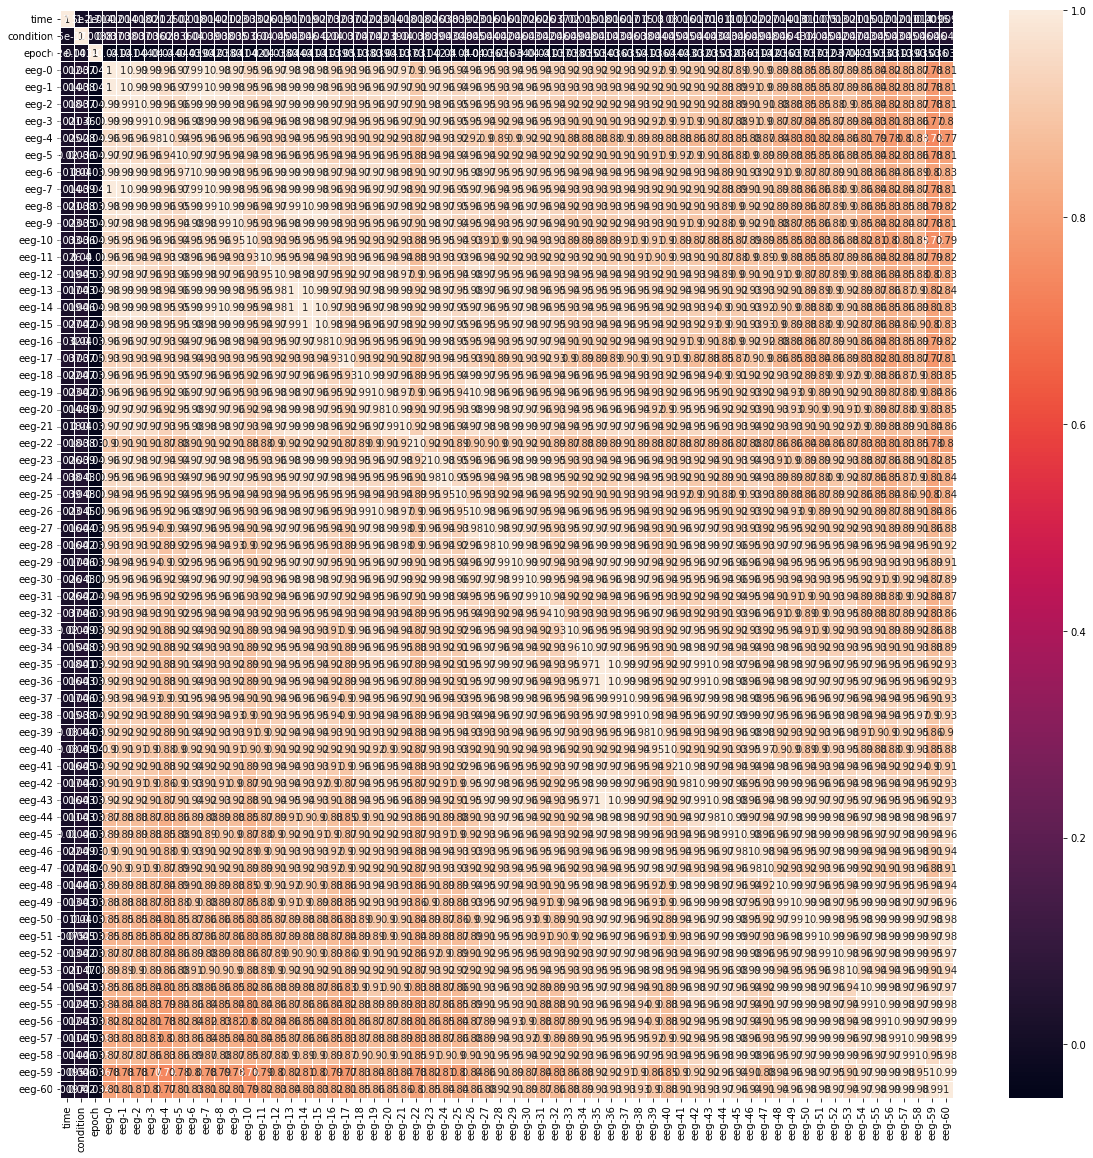

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidth=.5, ax=ax)

In [14]:
df.describe()

,time,condition,epoch,eeg-0,eeg-1,eeg-2,eeg-3,eeg-4,eeg-5,eeg-6,eeg-7,eeg-8,eeg-9,eeg-10,eeg-11,eeg-12,eeg-13,eeg-14,eeg-15,eeg-16,eeg-17,eeg-18,eeg-19,eeg-20,eeg-21,eeg-22,eeg-23,eeg-24,eeg-25,eeg-26,eeg-27,eeg-28,eeg-29,eeg-30,eeg-31,eeg-32,eeg-33,eeg-34,eeg-35,eeg-36,eeg-37,eeg-38,eeg-39,eeg-40,eeg-41,eeg-42,eeg-43,eeg-44,eeg-45,eeg-46,eeg-47,eeg-48,eeg-49,eeg-50,eeg-51,eeg-52,eeg-53,eeg-54,eeg-55,eeg-56,eeg-57,eeg-58,eeg-59,eeg-60
count,150780.000000,150780.000000,150780.000000,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05,1.507800e+05
mean,0.150391,4.000000,209.500000,3.040924e+05,3.904455e+05,6.159914e+05,6.563183e+05,9.073418e+05,8.066133e+05,8.252750e+05,4.234343e+05,7.866904e+05,8.872944e+05,1.444582e+06,1.172104e+06,7.096358e+05,6.670358e+05,6.908041e+05,1.150046e+06,1.475850e+06,1.983573e+06,1.025838e+06,9.558358e+05,4.308786e+05,6.315176e+05,7.318078e+05,1.025056e+06,1.776717e+06,1.677430e+06,1.001965e+06,6.413329e+05,6.309667e+05,6.263928e+05,1.208440e+06,9.485775e+05,1.657960e+06,9.405394e+05,6.222663e+05,6.805751e+05,6.262022e+05,6.492632e+05,5.500572e+05,1.316349e+06,1.280071e+06,8.580413e+05,6.579303e+05,6.232092e+05,4.303923e+05,4.087398e+05,9.459701e+05,1.101252e+06,5.401176e+05,4.840760e+05,4.114190e+05,2.871595e+05,5.556663e+05,9.058447e+05,6.524437e+05,4.657224e+05,4.925001e+05,4.759672e+05,6.832715e+05,3.402824e+05,4.100545e+05
std,0.202411,2.000007,121.243615,4.090030e+07,4.111546e+07,4.267090e+07,4.079301e+07,3.994457e+07,4.404713e+07,5.057393e+07,4.140217e+07,4.194410e+07,3.995742e+07,4.089455e+07,4.271656e+07,4.016768e+07,4.454501e+07,4.227533e+07,4.280550e+07,4.312214e+07,4.935318e+07,4.053402e+07,3.790169e+07,3.494585e+07,3.678396e+07,4.544459e+07,3.774788e+07,4.111142e+07,3.760695e+07,3.906598e+07,3.696784e+07,3.604669e+07,3.580105e+07,4.123520e+07,3.386228e+07,3.838781e+07,3.750080e+07,3.718102e+07,3.578466e+07,3.583714e+07,3.547233e+07,3.456067e+07,3.674723e+07,3.444864e+07,4.232305e+07,3.554313e+07,3.514229e+07,3.543428e+07,3.510668e+07,3.568015e+07,3.428525e+07,3.558877e+07,3.842711e+07,3.814859e+07,3.735157e+07,3.554626e+07,3.465838e+07,3.747495e+07,3.972644e+07,3.914543e+07,3.844467e+07,3.694882e+07,3.801439e+07,3.957666e+07
min,-0.199219,1.000000,0.000000,-3.236120e+08,-3.286734e+08,-3.437411e+08,-3.309618e+08,-3.191259e+08,-3.582858e+08,-4.185564e+08,-3.282002e+08,-3.392894e+08,-3.321269e+08,-3.353418e+08,-3.366318e+08,-3.141733e+08,-3.655110e+08,-3.468184e+08,-3.582778e+08,-3.638814e+08,-4.020620e+08,-3.250890e+08,-3.002955e+08,-2.700301e+08,-2.865155e+08,-3.536386e+08,-3.087204e+08,-3.397478e+08,-3.160365e+08,-3.098148e+08,-2.825767e+08,-2.710664e+08,-2.741065e+08,-3.332873e+08,-2.759471e+08,-3.106250e+08,-2.949170e+08,-2.802943e+08,-2.673764e+08,-2.685199e+08,-2.697863e+08,-2.637676e+08,-2.976588e+08,-2.774775e+08,-3.336860e+08,-2.598499e+08,-2.615078e+08,-2.601980e+08,-2.591096e+08,-2.764608e+08,-2.702168e+08,-2.644194e+08,-2.828298e+08,-2.823988e+08,-2.768330e+08,-2.631531e+08,-2.651358e+08,-2.679872e+08,-2.840378e+08,-2.872883e+08,-2.864799e+08,-2.822774e+08,-2.728022e+08,-2.856684e+08
25%,-0.025391,2.000000,104.750000,-1.063954e+07,-1.046231e+07,-1.032652e+07,-1.020180e+07,-1.090514e+07,-1.128445e+07,-1.081182e+07,-1.047505e+07,-1.032187e+07,-1.026054e+07,-1.0018

In [15]:
df.shape

(150780, 64)

#Exploratory Data Analysis (EDA)

In [16]:
cd /content

/content


In [17]:
%%capture
pip install ydata-profiling

In [18]:
import ydata_profiling as ydpf

In [19]:
prof = ydpf.ProfileReport(df)

In [20]:
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
for i in df.isnull().sum():
  if i>0:
    print(i)

#Feature Engineering

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df.iloc[:,3:], df.iloc[:,1], test_size=0.25, random_state=213)

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<AxesSubplot:ylabel='Density'>

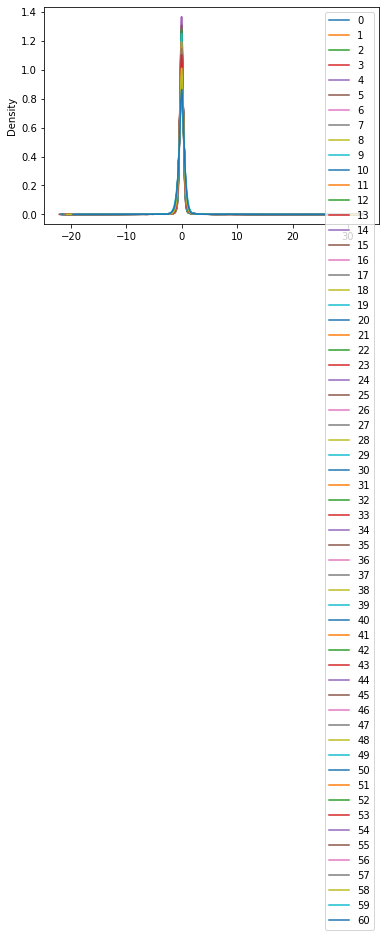

In [24]:
pd.DataFrame(X_train).plot.density()

#------------------------------------------------------- Rest vs Movement ------------------------------------------------

In [ ]:
y_train_rvm = y_train.map(lambda x:0 if(x==7) else 1)
y_test_rvm = y_test.map(lambda x:0 if(x==7) else 1)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_rvm = LogisticRegression()

In [ ]:
lr_rvm.fit(X_train, y_train_rvm)

In [29]:
y_pred_rvm_lr = lr_rvm.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rvm, y_pred_rvm_lr)

0.8588672237697307

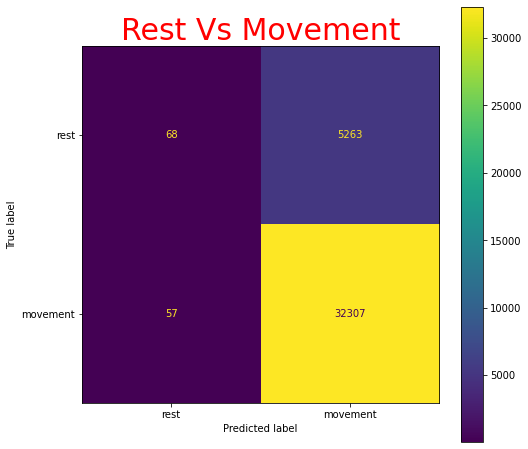

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_rvm, y_pred_rvm_lr)
labels = ['rest', 'movement']

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Rest Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

#KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn_rvm = KNeighborsClassifier(10)

In [36]:
knn_rvm.fit(X_train, y_train_rvm)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_rvm_knn = knn_rvm.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_rvm, y_pred_rvm_knn)

0.8778352566653402

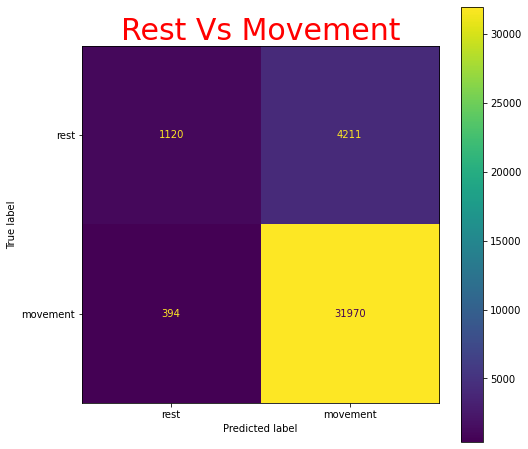

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_rvm, y_pred_rvm_knn)
labels = ['rest', 'movement']

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Rest Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
X = sc.fit_transform(df.iloc[:,3:])
y = df.iloc[:,1].map(lambda x:1 if(x==7) else 0)

In [42]:
cross_val_score(knn_rvm, X, y , cv=10)

array([0.85322987, 0.85190344, 0.85376045, 0.85143918, 0.85037803,
       0.85336251, 0.85177079, 0.8515055 , 0.8511739 , 0.85356148])

In [43]:
acc_vals = {}
acc_cross_vals_score = {}
for i in range(5,20):
  knn_rvm = KNeighborsClassifier(i)
  knn_rvm.fit(X_train, y_train_rvm)
  y_pred = knn_rvm.predict(X_test)
  acc_vals[i] = accuracy_score(y_test_rvm, y_pred_rvm_knn)
  acc_cross_vals_score[i] = cross_val_score(knn_rvm, X, y , cv=3)

In [80]:
max(acc_vals.values())*100

87.78352566653402

In [78]:
from statistics import mean
for k,v in acc_cross_vals_score.items():
  print(k, ":", mean(v)*100)

5 : 81.67794137153467
6 : 83.69346067117654
7 : 82.85714285714286
8 : 84.04960870141929
9 : 83.55683777689349
10 : 84.26913383737896
11 : 83.95078922934076
12 : 84.45881416633506
13 : 84.2353097227749
14 : 84.56758190741478
15 : 84.4044302957952
16 : 84.68828757129593
17 : 84.57885661228279
18 : 84.77052659503913
19 : 84.65976920015918


#Random Forrest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc_rvm = RandomForestClassifier()

In [46]:
rfc_rvm.fit(X_train, y_train_rvm)

RandomForestClassifier()

In [47]:
y_pred_mvm_rfc = rfc_rvm.predict(X_test)

In [48]:
accuracy_score(y_test_rvm, y_pred_mvm_rfc)

0.8664013794933015

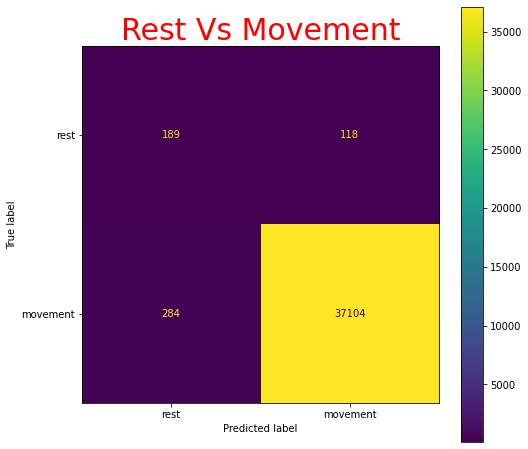

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred_mvm_rfc, y_pred)
labels = ['rest', 'movement']

fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Rest Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

#---------------------------------------------------- Movement vs Movement ------------------------------------------------

In [50]:
X_train_mvm,X_test_mvm, y_train_mvm,y_test_mvm = train_test_split(df[df["condition"]<7].iloc[:,3:], df[df["condition"]<7].iloc[:,1], test_size=0.25, random_state=213)

In [51]:
sc2 = StandardScaler()

X_train_mvm = sc2.fit_transform(X_train_mvm)
X_test_mvm = sc2.transform(X_test_mvm)

In [52]:
y_train_mvm = y_train_mvm.map(lambda x:x-1)
y_test_mvm = y_test_mvm.map(lambda x:x-1)

#KNN

In [53]:
knn_mvm = KNeighborsClassifier(10)
knn_mvm.fit(X_train_mvm, y_train_mvm)

KNeighborsClassifier(n_neighbors=10)

In [54]:
y_pred_mvm = knn_mvm.predict(X_test_mvm)

In [55]:
accuracy_score(y_test_mvm, y_pred_mvm)

0.4704425874342309

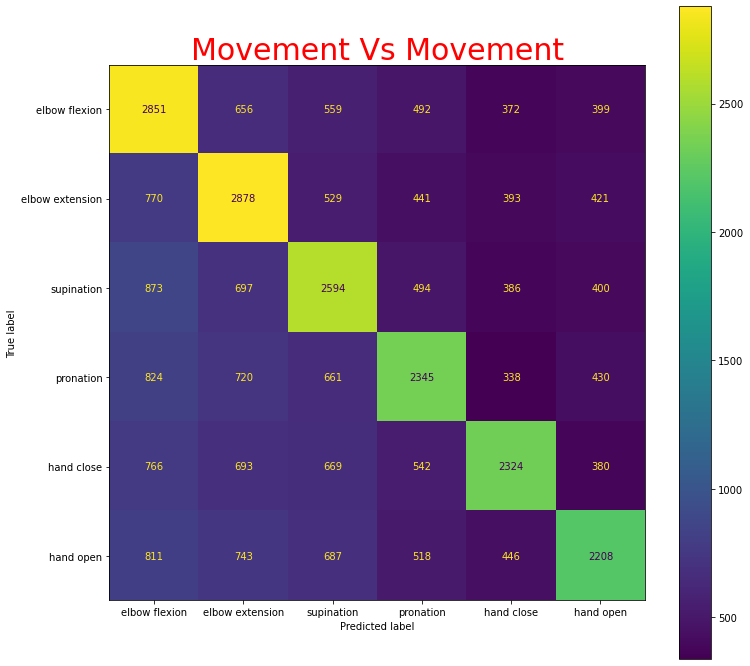

In [56]:
cm = confusion_matrix(y_test_mvm,y_pred_mvm)
labels = ['elbow flexion', 'elbow extension', 'supination', 'pronation', 'hand close', 'hand open']

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Movement Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)

#Random Forrest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc_mvm = RandomForestClassifier()

In [59]:
rfc_mvm.fit(X_train_mvm, y_train_mvm)

RandomForestClassifier()

In [60]:
y_pred_mvm_rfc = rfc_mvm.predict(X_test_mvm)

In [61]:
accuracy_score(y_test_mvm, y_pred_mvm_rfc)

0.49226245744351593

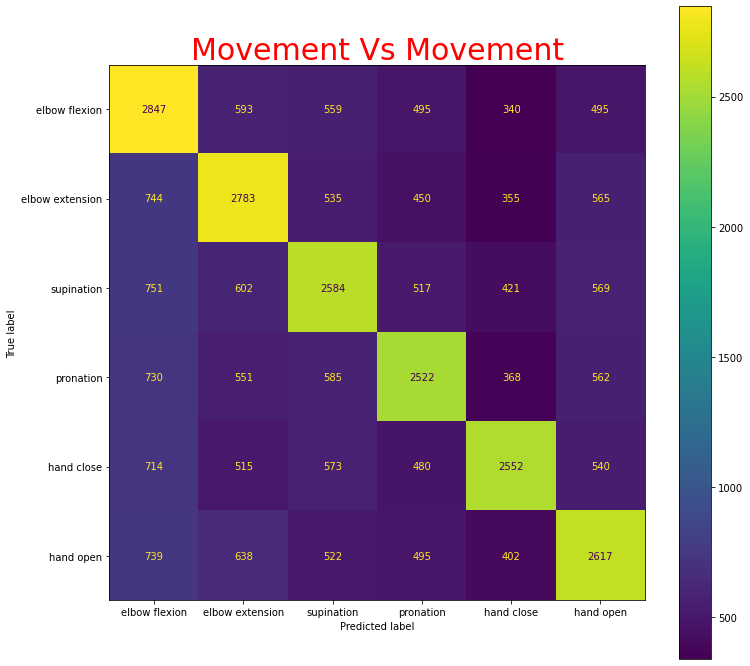

In [62]:
cm = confusion_matrix(y_test_mvm,y_pred_mvm_rfc)
labels = ['elbow flexion', 'elbow extension', 'supination', 'pronation', 'hand close', 'hand open']

fig, ax = plt.subplots(figsize=(12, 12))
plt.title("Movement Vs Movement",  fontdict = {'family':'sans-serif','color':'red','size':30})
ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)